In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import seaborn as sns

In [4]:
excel_file_path = 'Data/prc_hicp_midx__custom_8955744_spreadsheet.xlsx'
sheet_name = 'Feuille 1'
skip_rows = 8  # Skip the first 8 rows (start from the 9th row)

# Read the specific sheet from the Excel file, skipping the specified rows
data = pd.read_excel(excel_file_path, sheet_name=sheet_name, skiprows=skip_rows)

# Filter and keep only columns that do not start with "Unnamed"
data = data.loc[:, ~data.columns.str.startswith('Unnamed')]

/opt/mamba/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [25]:
data

,TIME,1996-01,1996-02,1996-03,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,...,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11
0,GEO (Libellés),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Union européenne (UE6-1958, UE9-1973, UE10-198...",60.62,61.72,62.31,62.76,65.85,67.23,65.57,62.4,61.59,...,135,136.88,135.96,139.65,141.6,140.92,138.55,138.16,140.93,:
2,Union européenne - 27 pays (à partir de 2020),:,:,:,:,:,:,:,:,:,...,135.18,137.07,136.14,139.85,141.79,141.11,138.74,138.35,141.13,:
3,Union européenne - 28 pays (2013-2020),:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
4,"Zone euro (EA11-1999, EA12-2001, EA13-2007, EA...",62.32,63.49,64.12,64.51,67.55,68.76,68.01,64.23,63.04,...,131.11,133.14,132.11,136.09,139.18,139.23,136.64,136.56,139.63,:
5,Zone euro - 20 pays (à partir de 2023),:,:,:,:,:,:,:,:,:,...,131.06,133.09,132.06,136.03,139.13,139.18,136.58,136.5,139.58,:
6,Zone euro - 19 pays (2015-2022),:,:,:,:,:,:,:,:,:,...,131.1,133.14,132.08,136.01,139.12,139.19,136.58,136.5,139.58,:
7,Belgique,60.01,60.98,62.4,63.37,69.25,69.77,64.92,66.15,64.14,...,111.86,123.98,118.48,122.68,121.56,120.43,118.02,118.07,118.53,:
8,Bulgarie,:,:,:,:,:,:,:,:,:,...,130.44,131.2,132.91,144.51,145.53,153.13,151,153.8,151.38,:
9,Tchéquie,:,:,:,:,:,:,:,:,:,...,135.6,134.4,133.3,139.3,137.4,131.4,131.9,126.9,130.7,:


In [5]:
df = data.iloc[1:-6]

In [8]:
df

,TIME,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11
1,"Union européenne (UE6-1958, UE9-1973, UE10-198...",135,136.88,135.96,139.65,141.6,140.92,138.55,138.16,140.93,:
2,Union européenne - 27 pays (à partir de 2020),135.18,137.07,136.14,139.85,141.79,141.11,138.74,138.35,141.13,:
3,Union européenne - 28 pays (2013-2020),:,:,:,:,:,:,:,:,:,:
4,"Zone euro (EA11-1999, EA12-2001, EA13-2007, EA...",131.11,133.14,132.11,136.09,139.18,139.23,136.64,136.56,139.63,:
5,Zone euro - 20 pays (à partir de 2023),131.06,133.09,132.06,136.03,139.13,139.18,136.58,136.5,139.58,:
6,Zone euro - 19 pays (2015-2022),131.1,133.14,132.08,136.01,139.12,139.19,136.58,136.5,139.58,:
7,Belgique,111.86,123.98,118.48,122.68,121.56,120.43,118.02,118.07,118.53,:
8,Bulgarie,130.44,131.2,132.91,144.51,145.53,153.13,151,153.8,151.38,:
9,Tchéquie,135.6,134.4,133.3,139.3,137.4,131.4,131.9,126.9,130.7,:
10,Danemark,119.1,117.8,120.8,119,119.8,121.7,120.6,120.9,121,:


In [6]:
df = df[df.iloc[:, 0].str.startswith("France")]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 16 to 16
Columns: 336 entries, TIME to 2023-11
dtypes: object(336)
memory usage: 2.6+ KB


In [29]:
df

,TIME,1996-01,1996-02,1996-03,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,...,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11
16,France,63.93,64.77,65.95,65.43,77.11,77.15,71.19,61.69,62.19,...,140.61,143.86,142.49,146,147.29,146.54,145.41,143.69,145.37,:


In [7]:
st = df.iloc[:, 1:]

In [33]:
st

,1996-01,1996-02,1996-03,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11
16,63.93,64.77,65.95,65.43,77.11,77.15,71.19,61.69,62.19,61.36,...,140.61,143.86,142.49,146,147.29,146.54,145.41,143.69,145.37,:


In [8]:
st = st.T

In [38]:
st

,16
1996-01,63.93
1996-02,64.77
1996-03,65.95
1996-04,65.43
1996-05,77.11
...,...
2023-07,146.54
2023-08,145.41
2023-09,143.69
2023-10,145.37


In [9]:
st.columns = ['Prix']

In [10]:
st.replace(":", np.nan, inplace=True)

In [52]:
st

,Prix
1996-01,63.93
1996-02,64.77
1996-03,65.95
1996-04,65.43
1996-05,77.11
...,...
2023-07,146.54
2023-08,145.41
2023-09,143.69
2023-10,145.37


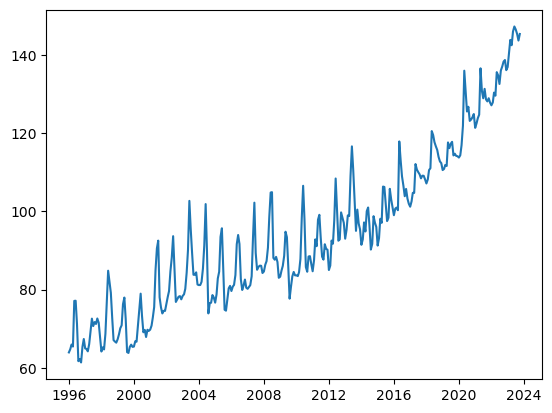

In [12]:
plt.plot(st['Prix'])

In [11]:
st.index = pd.to_datetime(st.index, format='%Y-%m')

In [77]:
st

,Prix,month
1996-01-01,63.93,1
1996-02-01,64.77,2
1996-03-01,65.95,3
1996-04-01,65.43,4
1996-05-01,77.11,5
...,...,...
2023-07-01,146.54,7
2023-08-01,145.41,8
2023-09-01,143.69,9
2023-10-01,145.37,10


In [62]:
df_monthly_sum = st.groupby(lambda x: x.month).sum()

In [13]:
st.index.month

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       ...
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
      dtype='int32', length=335)

/tmp/ipykernel_1866/4279532222.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='Prix', data=st,palette=sns.color_palette('muted', 12))


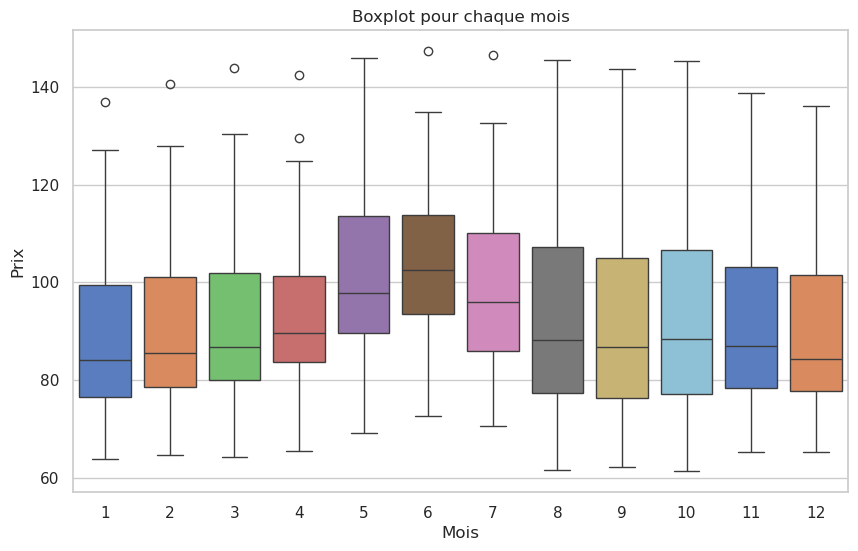

In [75]:
st['month'] = st.index.month

# Créez un boxplot avec seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='Prix', data=st,palette=sns.color_palette('muted', 12))
plt.title('Boxplot pour chaque mois')
plt.xlabel('Mois')
plt.ylabel('Prix')
plt.show()

/tmp/ipykernel_1866/3622458065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df_filtered.index.year
/tmp/ipykernel_1866/3622458065.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='Prix', data=df_filtered,palette=sns.color_palette('muted', 12))
/tmp/ipykernel_1866/3622458065.py:6: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  sns.boxplot(x='year', y='Prix', data=df_filtered,palette=sns.color_palette('muted', 12))


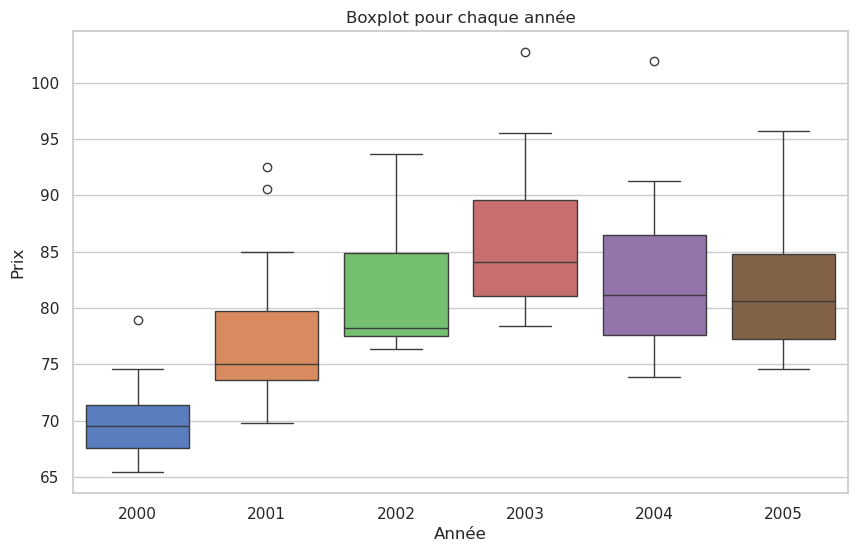

In [87]:
df_filtered['year'] = df_filtered.index.year

# Créez un boxplot avec seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='Prix', data=df_filtered,palette=sns.color_palette('muted', 12))
plt.title('Boxplot pour chaque année')
plt.xlabel('Année')
plt.ylabel('Prix')
plt.show()

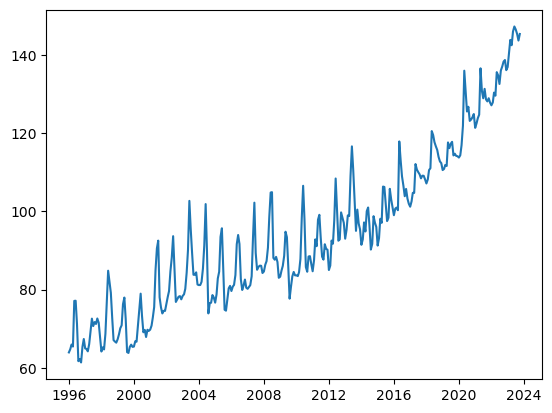

In [58]:
plt.plot(st)

In [80]:
st

,Prix,month
1996-01-01,63.93,1
1996-02-01,64.77,2
1996-03-01,65.95,3
1996-04-01,65.43,4
1996-05-01,77.11,5
...,...,...
2023-07-01,146.54,7
2023-08-01,145.41,8
2023-09-01,143.69,9
2023-10-01,145.37,10


In [81]:
df_filtered = st['2000-01-01':'2005-12-01']

In [ ]:
petit = st['2000-01-01':'2000-12-01']

In [82]:
df_filtered

,Prix,month
2000-01-01,65.42,1
2000-02-01,66.79,2
2000-03-01,66.67,3
2000-04-01,70.77,4
2000-05-01,74.54,5
...,...,...
2005-08-01,74.85,8
2005-09-01,74.61,9
2005-10-01,77.45,10
2005-11-01,80.32,11


/tmp/ipykernel_1866/2354909021.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='Prix', data=df_filtered,palette=sns.color_palette('muted', 12))


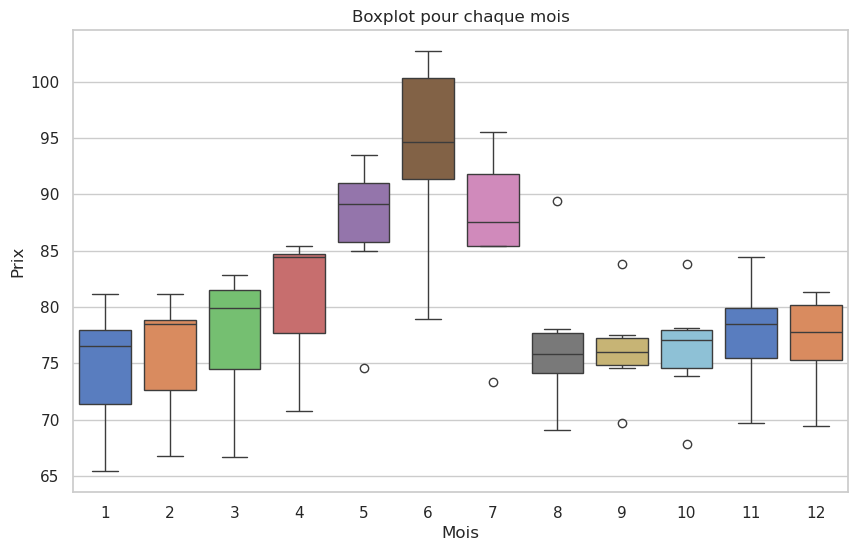

In [83]:
# Créez un boxplot avec seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='Prix', data=df_filtered,palette=sns.color_palette('muted', 12))
plt.title('Boxplot pour chaque mois')
plt.xlabel('Mois')
plt.ylabel('Prix')
plt.show()

In [14]:
st['diff'] = st.Prix - st.Prix.shift(1)

In [90]:
st

,Prix,month,year,diff
1996-01-01,63.93,1,1996,NaN
1996-02-01,64.77,2,1996,0.84
1996-03-01,65.95,3,1996,1.18
1996-04-01,65.43,4,1996,-0.52
1996-05-01,77.11,5,1996,11.68
...,...,...,...,...
2023-07-01,146.54,7,2023,-0.75
2023-08-01,145.41,8,2023,-1.13
2023-09-01,143.69,9,2023,-1.72
2023-10-01,145.37,10,2023,1.68


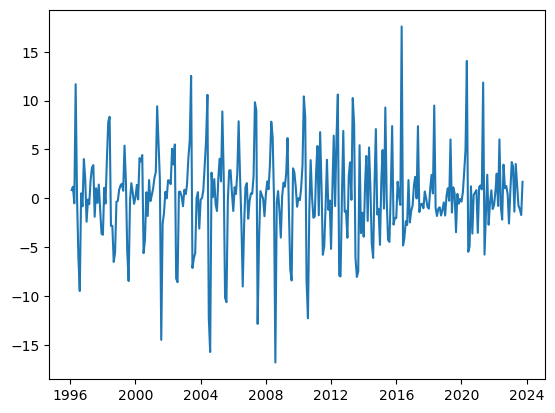

In [17]:
plt.plot(st['diff'])

/tmp/ipykernel_1866/364615591.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='diff', data=st,palette=sns.color_palette('muted', 12))


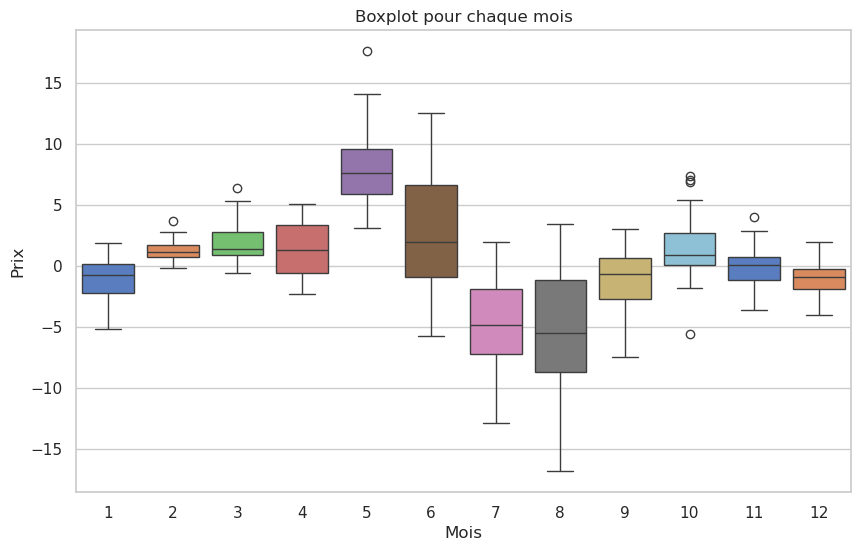

In [92]:
# Créez un boxplot avec seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='diff', data=st,palette=sns.color_palette('muted', 12))
plt.title('Boxplot pour chaque mois')
plt.xlabel('Mois')
plt.ylabel('Prix')
plt.show()